In [17]:
import numpy
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import (
    plot_decision_boundary,
    sigmoid,
    load_planar_dataset,
    load_extra_datasets,
)

%matplotlib inline
np.random.seed(1)

In [18]:
X, Y = load_planar_dataset()


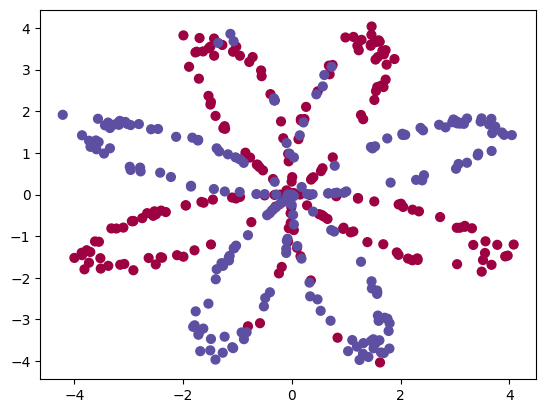

In [19]:
plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral);

In [20]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1] # training set size

print("The shape of X is :" + str(shape_X))
print("The shape of Y is :" + str(shape_Y))
print("I have m = %d training examples!" % (m))

The shape of X is :(2, 400)
The shape of Y is :(1, 400)
I have m = 400 training examples!


In [21]:
clf = sklearn.linear_model.LogisticRegressionCV()
Y_reshaped = Y.ravel()
clf.fit(X.T, Y_reshaped);

C:\Users\vhsch\AppData\Local\Temp\ipykernel_24868\121381236.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  % float(


Accuracy of Logistic Regression: 47%(precentage of correctly labelled datapoints)


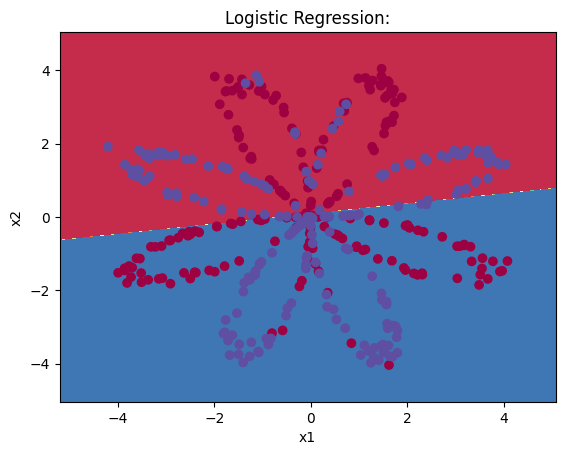

In [22]:
plot_decision_boundary(lambda x : clf.predict(x), X, Y)
plt.title("Logistic Regression:")

LR_predictions = clf.predict(X.T)
print(
    "Accuracy of Logistic Regression: %d" 
    % float(
        (np.dot(Y, LR_predictions) + np.dot( 1 - Y , 1 - LR_predictions))
        / float(Y.size)
        * 100
    )
    + "%"
    + "(precentage of correctly labelled datapoints)"
)
          

In [23]:
def layer_sizes(X, Y):

    n_x = X.shape[0] # the size of the input layer
    n_h = 4 # the size of the hidden layer
    n_y = Y.shape[0] # the size of the output layer

    return (n_x, n_h, n_y)

In [24]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [25]:
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(2)

    scale_factor = 0.01
    W1 = np.random.randn(n_h, n_x) * scale_factor
    b1 = np.zeros((n_h, 1)) 
    W2 = np.random.randn(n_y, n_h) * scale_factor
    b2 = np.zeros((n_y, 1))

    assert W1.shape == (n_h, n_x)
    assert b1.shape == (n_h, 1)
    assert W2.shape == (n_y, n_h)
    assert b2.shape == (n_y, 1)

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters
    

In [26]:


n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))



W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [27]:
def forward_propagation(X, parameters):
    
    W1 = parameters.get("W1")
    b1 = parameters.get("b1")
    W2 = parameters.get("W2")
    b2 = parameters.get("b2")

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert A2.shape == (1, X.shape[1])

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, cache

In [29]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

print(
    f"Z1: {cache.get('Z1')}\n"
    f"A1: {cache.get('A1')}\n"
    f"Z2: {cache.get('Z2')}\n"
    f"A2: {cache.get('A1')}\n"
)

print(
    np.mean(cache["Z1"]),
    np.mean(cache["A1"]),
    np.mean(cache["Z2"]),
    np.mean(cache["A2"]),
)

Z1: [[ 1.7386459   1.74687437  1.74830797]
 [-0.81350569 -0.73394355 -0.78767559]
 [ 0.29893918  0.32272601  0.34788465]
 [-0.2278403  -0.2632236  -0.22336567]]
A1: [[ 0.9400694   0.94101876  0.94118266]
 [-0.67151964 -0.62547205 -0.65709025]
 [ 0.29034152  0.31196971  0.33449821]
 [-0.22397799 -0.25730819 -0.2197236 ]]
Z2: [[-1.30737426 -1.30844761 -1.30717618]]
A2: [[ 0.9400694   0.94101876  0.94118266]
 [-0.67151964 -0.62547205 -0.65709025]
 [ 0.29034152  0.31196971  0.33449821]
 [-0.22397799 -0.25730819 -0.2197236 ]]

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [32]:
def compute_cost(A2, Y, parameters):

    m = Y.shape[1] #number of example

    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = (-1 / m) * np.sum(logprobs)

    cost = float(np.squeeze(cost)) # to make the dimension of the cost as required

    assert isinstance(cost, float)

    return cost

In [33]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [42]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]

    W1 = parameters.get("W1")
    W2 = parameters.get("W2")
    A1 = cache.get("A1")
    A2 = cache.get("A2")

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis  = 1, keepdims = True)
    dZ1 =  np.dot(W2.T, dZ2) * ( 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [43]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [45]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters.get("W1")
    b1 = parameters.get("b1")
    W2 = parameters.get("W2")
    b2 = parameters.get("b2")

    dW1 = grads.get("dW1")
    db1 = grads.get("db1")
    dW2 = grads.get("dW2")
    db2 = grads.get("db2")

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters
    

In [46]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [47]:
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost = False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y, parameters)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i : %f" % (i , cost))

    return parameters

In [48]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(
    X_assess, Y_assess, 4, 1.02, num_iterations=10000, print_cost=True
)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0 : 0.692739
Cost after iteration 1000 : 0.000257
Cost after iteration 2000 : 0.000127
Cost after iteration 3000 : 0.000084
Cost after iteration 4000 : 0.000063
Cost after iteration 5000 : 0.000050
Cost after iteration 6000 : 0.000042
Cost after iteration 7000 : 0.000036
Cost after iteration 8000 : 0.000031
Cost after iteration 9000 : 0.000028
W1 = [[-0.65400312  1.21068652]
 [-0.75688005  1.38443617]
 [ 0.57449374 -1.0957478 ]
 [ 0.76242342 -1.40517716]]
b1 = [[ 0.2841426 ]
 [ 0.34699428]
 [-0.23981061]
 [-0.35351855]]
W2 = [[-2.42329584 -3.22274999  1.97978376  3.31771228]]
b2 = [[0.20282644]]


In [53]:
def predict(parameters, X):

    A2, _ = forward_propagation(X, parameters)
    predictions = A2 > 0.5

    return predictions

In [54]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0 : 0.693048
Cost after iteration 1000 : 0.288083
Cost after iteration 2000 : 0.254385
Cost after iteration 3000 : 0.233864
Cost after iteration 4000 : 0.226792
Cost after iteration 5000 : 0.222644
Cost after iteration 6000 : 0.219731
Cost after iteration 7000 : 0.217504
Cost after iteration 8000 : 0.219447
Cost after iteration 9000 : 0.218605


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

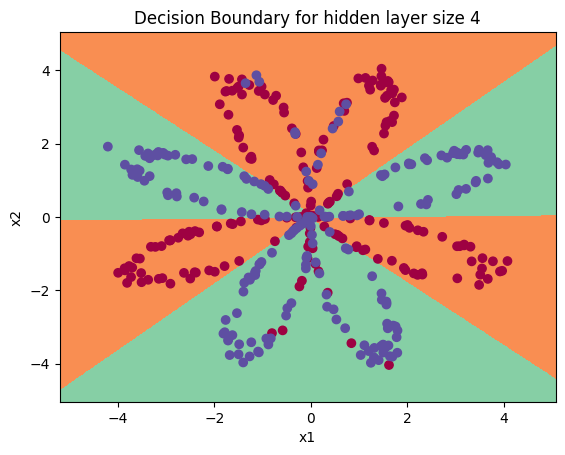

In [55]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 1.2, num_iterations=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [56]:
predictions = predict(parameters, X)
print(
    "Accuracy: %d"
    % float(
        (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T))
        / float(Y.size)
        * 100
    )
    + "%"
)

Accuracy: 90%


C:\Users\vhsch\AppData\Local\Temp\ipykernel_24868\1284469074.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  % float(


C:\Users\vhsch\AppData\Local\Temp\ipykernel_24868\423601150.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float(


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


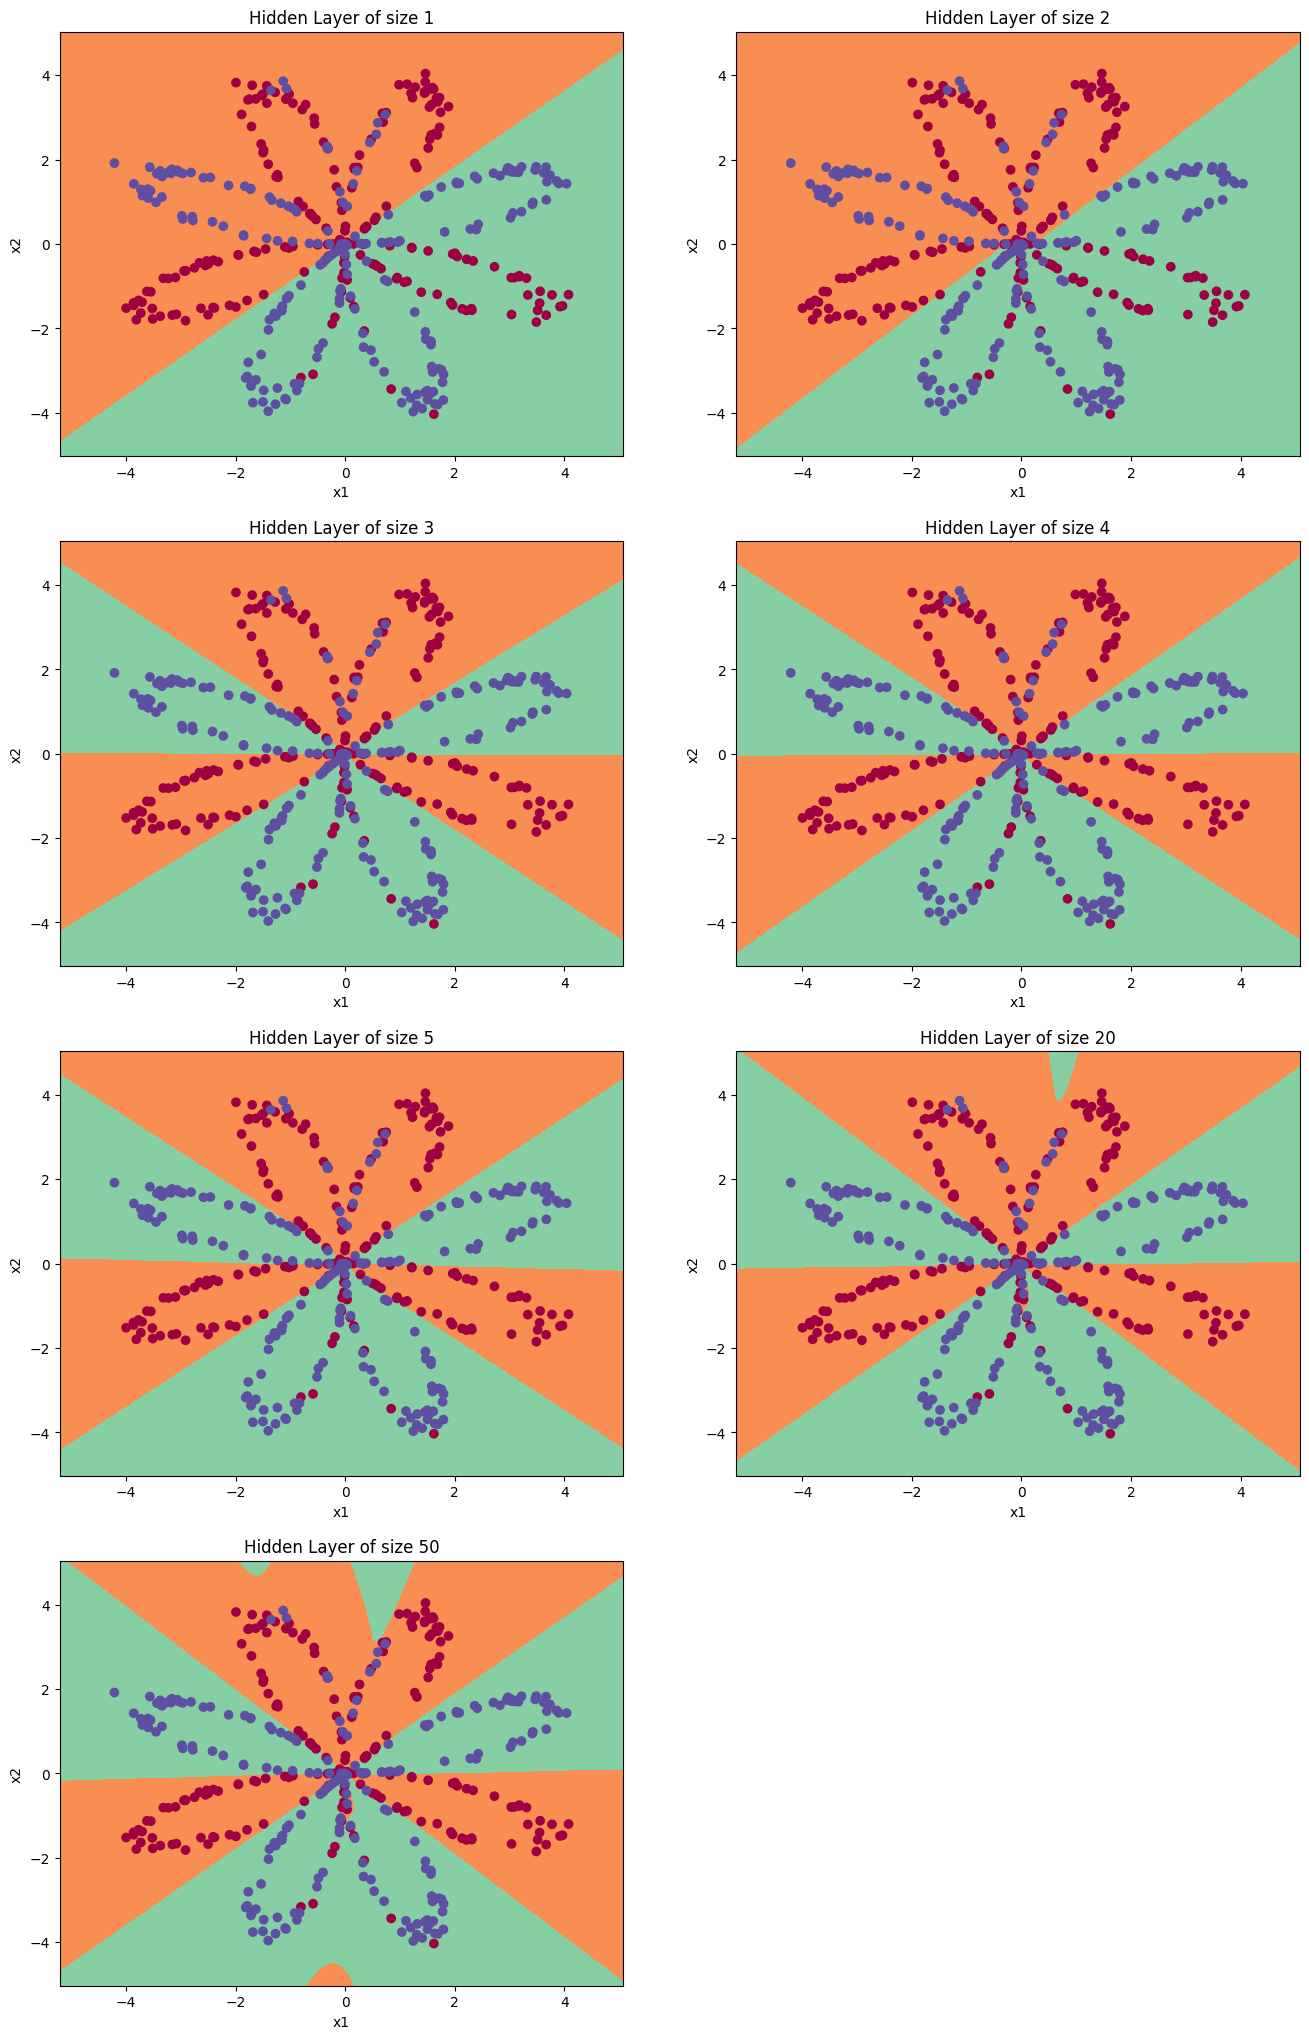

In [57]:

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title("Hidden Layer of size %d" % n_h)
    parameters = nn_model(X, Y, n_h, 1.2, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float(
        (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T))
        / float(Y.size)
        * 100
    )
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [ ]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = (
    load_extra_datasets()
)

atasets = {
    "noisy_circles": noisy_circles,
    "noisy_moons": noisy_moons,
    "blobs": blobs,
    "gaussian_quantiles": gaussian_quantiles,
}

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y % 2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);